*** 
# Final Project Milestone #4: Analysis 
### Felicia Faith Hangge 
### 6 May 2025 

#### Analyzing Citi Bike usage trends in New York City to assist Citi Bike and their parent company Lyft make smarter bussiness decisions by providing insights on when, where, and how people use their bikes. 

##### Data Source: https://citibikenyc.com/system-data (202410-citibike-tripdata_1.csv)
***

## 1.) Importing Dataset + Libraries 
***

In [293]:
import pandas as pd
import matplotlib.pyplot as plt

In [294]:
file_path = "cleaned_citibike_oct2024.csv"
df = pd.read_csv('/Users/faitth/Desktop/CMP-262/Final Project/cleaned_citibike_oct2024.csv')
low_memory=False

/var/folders/6t/l24_hh0d7rddqfw4j3qphcfw0000gn/T/ipykernel_90099/1120825568.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/faitth/Desktop/CMP-262/Final Project/cleaned_citibike_oct2024.csv')


In [295]:
df.columns

Index(['RideID', 'BikeType', 'StartTime', 'EndTime', 'StartStation',
       'StartStationID', 'EndStation', 'EndStationID', 'StartLat', 'StartLng',
       'EndLat', 'EndLng', 'UserType', 'RideDurationMin'],
      dtype='object')

***

## Question #1: Which start and end stations are the most and least popular?
***

#### Using value_counts() function to get the most and least popular starting stations

In [299]:
top_start = df['StartStation'].value_counts().head(10)
bottom_start = df['StartStation'].value_counts().tail(10)

In [300]:
top_start

StartStation
Central Park S & 6 Ave        3319
8 Ave & W 31 St               3253
7 Ave & Central Park South    3093
W 30 St & 10 Ave              3082
Broadway & E 21 St            2814
Lafayette St & E 8 St         2802
West St & Chambers St         2773
W 21 St & 6 Ave               2740
E 17 St & Broadway            2721
Broadway & E 14 St            2692
Name: count, dtype: int64

In [301]:
bottom_start

StartStation
37 Ave & 113 St           9
Church Ave & E 45 St      9
64 St & 3 Ave             8
Keegan Rd & 2 Ave         8
E 38 St & Church Ave      7
Decatur Ave & E 197 St    7
E 48 St & Tilden Ave      7
Tibbett Ave & W 234 St    6
65 St & 2 Ave             5
9 Ave & W 204 St          3
Name: count, dtype: int64

#### Using value_counts() function to get the most and least popular ending stations

In [303]:
top_end = df['EndStation'].value_counts().head(10)
bottom_end = df['EndStation'].value_counts().tail(10)

In [304]:
top_end

EndStation
University Pl & E 14 St       7711
8 Ave & W 31 St               7521
Pier 61 at Chelsea Piers      6257
7 Ave & Central Park South    6182
Broadway & W 58 St            6168
9 Ave & W 33 St               6163
Broadway & E 14 St            6099
Broadway & W 25 St            6047
11 Ave & W 41 St              5906
Central Park S & 6 Ave        5865
Name: count, dtype: int64

In [305]:
bottom_end

EndStation
Page Pl & Grand Ave                  1
E 34 St & Church Ave                 1
Vyse Ave & E 181 St                  1
Grand Ave & W Fordham Rd             1
57 Rd & 58 St                        1
Pacific St & Thomas S. Boyland St    1
Schenectady Ave & Pacific St         1
114 St & 39 Ave                      1
Borden Ave & 25 St                   1
4 St & Grand St                      1
Name: count, dtype: int64

#### Simplifying station names for plots

In [307]:
def simplify_names(index):
    return index.str.replace("Street", "St", regex=False)\
                .str.replace("Avenue", "Ave", regex=False)\
                .str.replace("+", "&", regex=False)

top_start.index = simplify_names(top_start.index)
top_end.index = simplify_names(top_end.index)
bottom_start.index = simplify_names(bottom_start.index)
bottom_end.index = simplify_names(bottom_end.index)

#### Creating plots

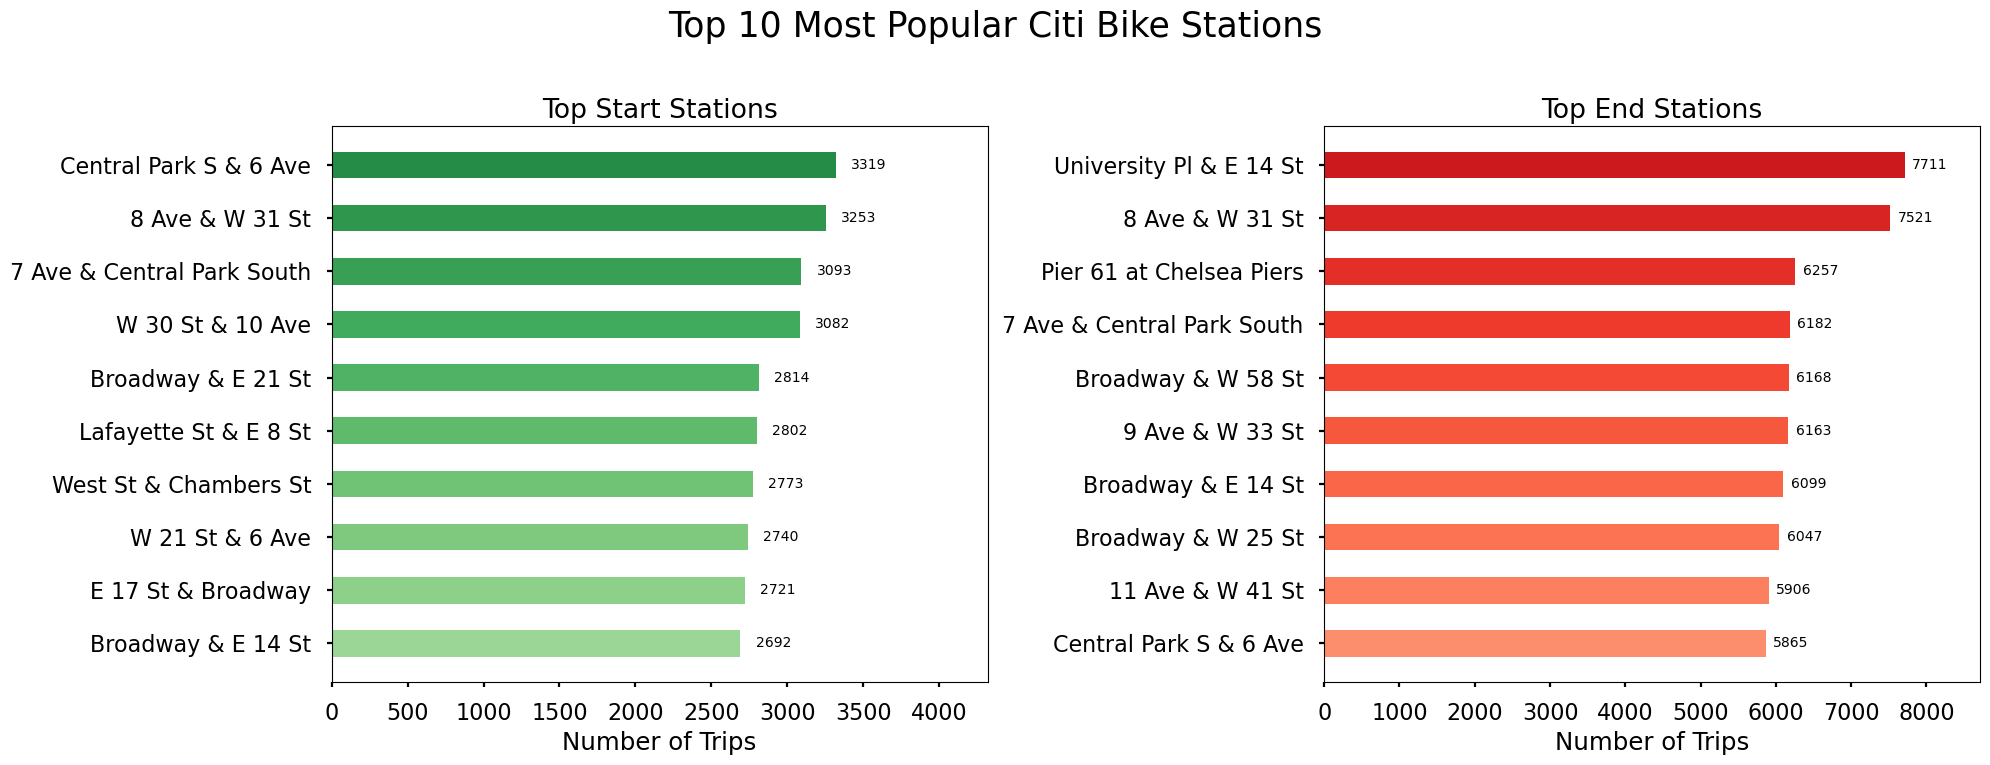

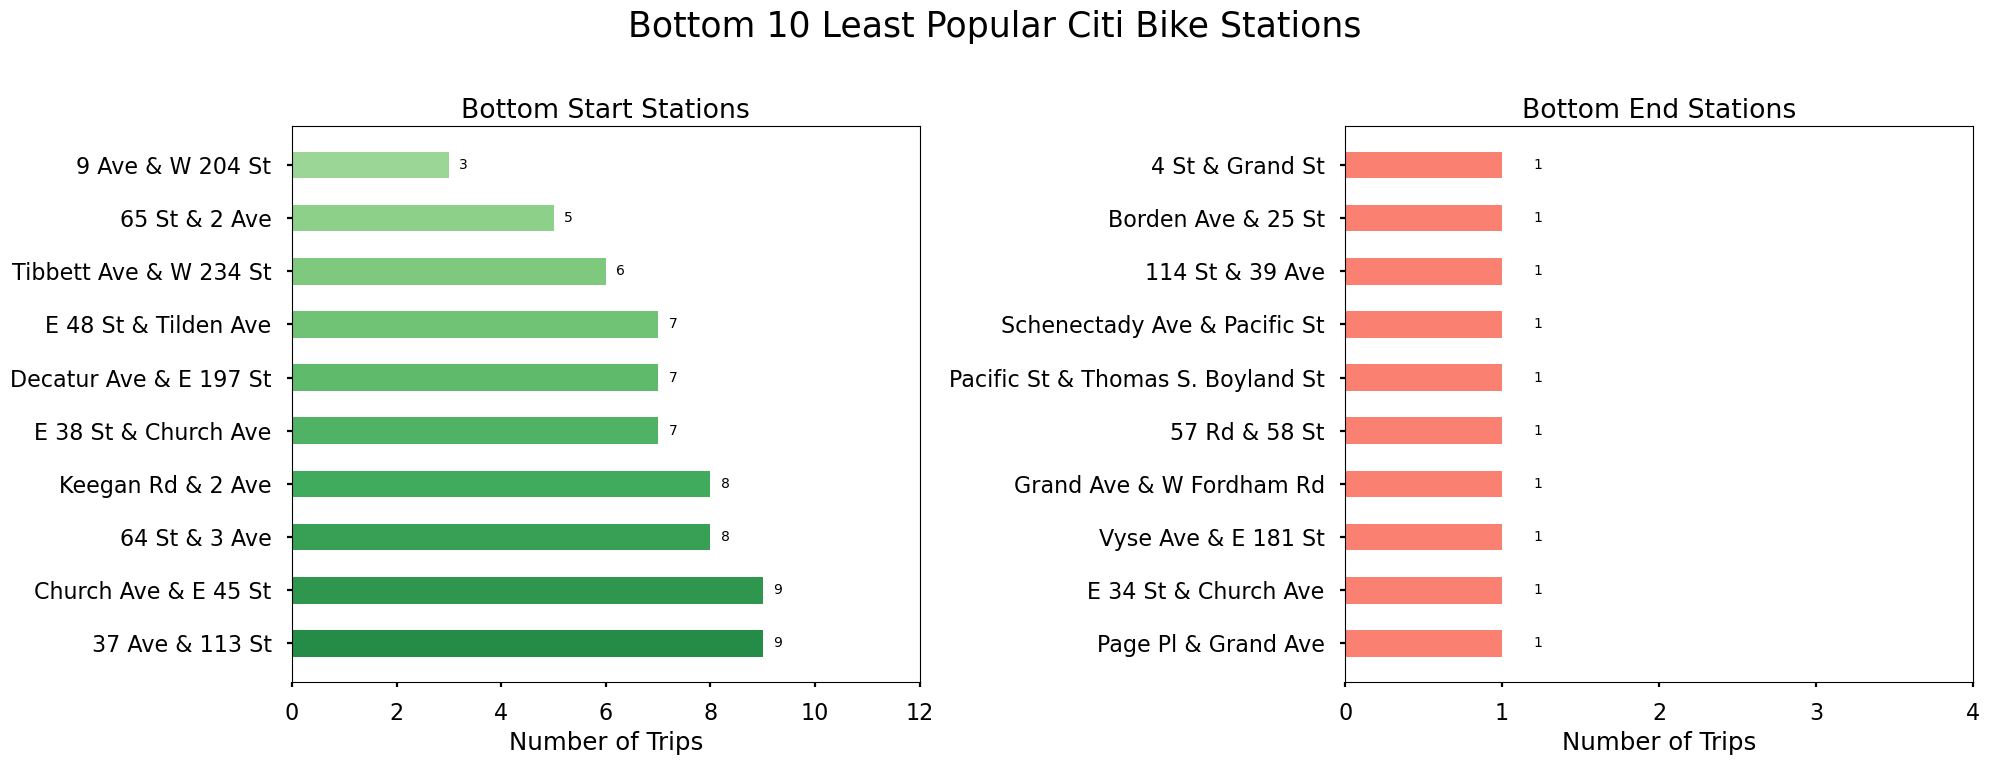

In [309]:
### MOST POPULAR STATIONS 

fig, axs = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Top 10 Most Popular Citi Bike Stations', fontsize=25)

### start staions
top_start_colors = plt.cm.Greens(range(100, 100 + len(top_start)*10, 10))
bars1 = axs[0].barh(top_start.index[::-1], top_start.values[::-1], color=top_start_colors, height=0.5)
axs[0].set_title('Top Start Stations')
axs[0].set_xlabel('Number of Trips')
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[0].set_xlim(0, top_start.max() + 1000)

for i, value in enumerate(top_start.values[::-1]):
    axs[0].text(value + 100, i, str(value), va='center', fontsize=10)

### end stations
top_end_colors = plt.cm.Reds(range(100, 100 + len(top_end)*10, 10))
bars2 = axs[1].barh(top_end.index[::-1], top_end.values[::-1], color=top_end_colors, height=0.5)
axs[1].set_title('Top End Stations')
axs[1].set_xlabel('Number of Trips')
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].set_xlim(0, top_end.max() + 1000)

for i, value in enumerate(top_end.values[::-1]):
    axs[1].text(value + 100, i, str(value), va='center', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])



### LEAST POPULAR STATIONS 

fig, axs = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Bottom 10 Least Popular Citi Bike Stations', fontsize=25)

### start stations 
bottom_start_colors = plt.cm.Greens(list(reversed(range(100, 100 + len(bottom_start)*10, 10))))
bars3 = axs[0].barh(bottom_start.index, bottom_start.values, color=bottom_start_colors, height=0.5)
axs[0].set_title('Bottom Start Stations')
axs[0].set_xlabel('Number of Trips')
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[0].set_xlim(0, bottom_start.max() + 3)

for i, value in enumerate(bottom_start.values):
    axs[0].text(value + 0.2, i, str(value), va='center', fontsize=10)

### end stations 
bars4 = axs[1].barh(bottom_end.index, bottom_end.values, color='salmon', height=0.5)
axs[1].set_title('Bottom End Stations')
axs[1].set_xlabel('Number of Trips')
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].set_xlim(0, bottom_end.max() + 3)

for i, value in enumerate(bottom_end.values):
    axs[1].text(value + 0.2, i, str(value), va='center', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

***
## Question #2: What percentage of rides are taken on each bike type (classic vs electric)? 
***

#### Using groupby, mean, and round functions to get average ride duration for each user type

In [312]:
avg_duration = df.groupby('UserType')['RideDurationMin'].mean().round(2)
avg_duration

UserType
casual    19.05
member    12.34
Name: RideDurationMin, dtype: float64

#### Formatting names to look nicer

In [314]:
avg_duration.index = avg_duration.index.str.title()

#### Setting colors for plot to CitiBike's logo colors

In [316]:
colors = ['#003b70', '#d9261c']

#### Creating plot

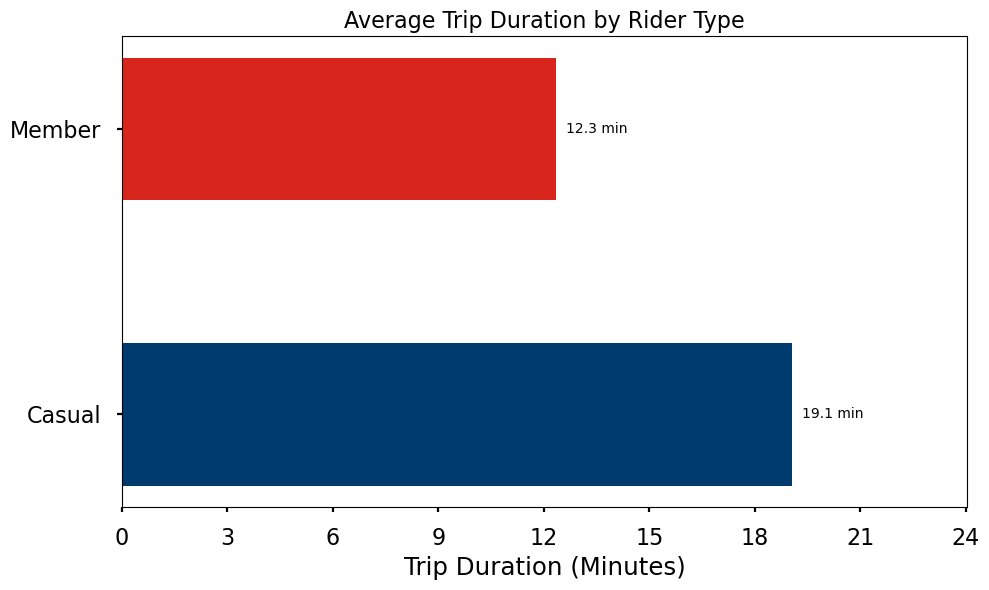

In [318]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(avg_duration.index, avg_duration.values, color=colors, height=0.5)
ax.set_title('Average Trip Duration by Rider Type', fontsize=16)
ax.set_xlabel('Trip Duration (Minutes)')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim(0, avg_duration.max() + 5)

for i, value in enumerate(avg_duration.values):
    ax.text(value + 0.3, i, f"{value:.1f} min", va='center', fontsize=10)

plt.tight_layout()

***